进行 III  II  其它  没有爆发
的分类，最后一版了，其它花里胡哨的分类方式都不做了
就多来几个神经网络试一下多分类的效果

包括：
* Inception
* ResNet
* SPP-Net

然后，再用训练好的网络，尝试其它天文台的数据的验证结果
首先用Culgoora进行验证，然后再尝试用lofar、槎山工作站的数据进行测试


1.1版本是没有进行数据扩充的

之后还要用各种办法进行扩充

In [1]:

from keras import models
from keras import layers


Using TensorFlow backend.


In [3]:
model  = models.Sequential()
#卷积层，参数意义分别为：
#经过这一层之后，特征图的个数，一个卷积核，产生一个特征图，第一层：32，说明有32个卷积核；第二层64，说明在第一层的特征图基础上，每张特征图有两个卷积核进行特征采集
#卷积核大小
#激活函数
#输入大小（只在开始的第一层有，后面不需要）
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(400,100,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 398, 98, 32)       896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 199, 49, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 197, 47, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 10, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61440)            

In [4]:
#配置模型的损失函数、优化器、指标名称
from keras import optimizers

model.compile(loss='categorical_crossentropy',          #损失函数
optimizer=optimizers.RMSprop(lr=1e-4),             #优化器
metrics=['acc'])                                   #指标名称


In [5]:
#图片的训练路径和验证路径
train_dir = r'G:\useful_L\Normal\NEW_NET_4.0\train'
validation_dir = r'G:\useful_L\Normal\NEW_NET_4.0\val'


In [6]:
#生成训练需要的图片和标签
from keras.preprocessing.image import ImageDataGenerator
#将图片大小调整到1以内，原先图片每个像素的格式为uint8，所以要除以255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#根据目录的名称，生成对应的标签
#train_dir有Ⅱ型和Ⅲ型的图片
#每次生成batch_size数量的图片，图片大小为target_size
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(400, 100),              #生成图片的大小
batch_size=26,                       #一次生成图片的数量
class_mode='categorical')                 #图片标签的类型

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(400, 100),              #生成图片的大小
batch_size=10,                       #一次生成图片的数量
class_mode='categorical')                 #图片标签的类型


Found 2600 images belonging to 4 classes.
Found 790 images belonging to 4 classes.


In [7]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='实验1.1_best.h5',monitor='val_acc',mode='auto' ,save_best_only='True')

history = model.fit_generator(
train_generator,                           #通过生成器传入图片和标签
steps_per_epoch=100,                       #分100次传入，每次26张
epochs=50,                                 #总共训练40轮
validation_data=validation_generator,      #通过生成器传入图片和标签进行验证
validation_steps=79,                       #分60次传入，每次10张
callbacks = [checkpoint]
)

Epoch 1/50
100/100 [==============================] - 16s 164ms/step - loss: 1.0735 - acc: 0.5262 - val_loss: 1.0356 - val_acc: 0.6304

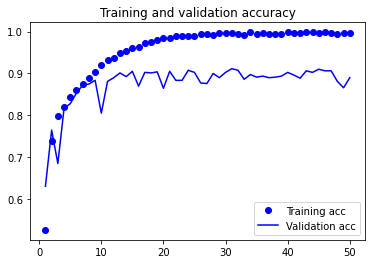

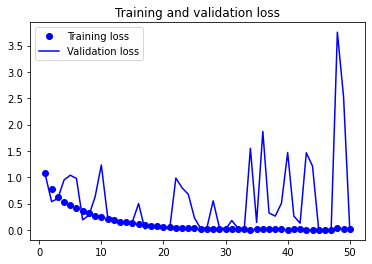

In [8]:
#绘制训练精度、验证精度
#绘制训练损失、验证损失
#python画图库，类似matlab的plot
import matplotlib.pyplot as plt
acc = history.history['acc']             #得到训练的指标数据
val_acc = history.history['val_acc']     #得到验证的指标数据
loss = history.history['loss']           #得到训练损失
val_loss = history.history['val_loss']   #得到验证损失
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.savefig('多分类1.1_accuracy_50.png')
plt.legend()                              #画图例
plt.figure()                              #另一张图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.savefig('多分类1.1_loss_50.png')
plt.legend()
plt.show()                                #画图，最后加上

In [9]:
# 保存每轮的精度和损失

file = open('多分类1.1_acc_loss_50.txt','w')
file.write('训练精度：')
for i in acc :
    file.write(str(i))
    file.write(" ")
file.write("\n")
file.write('验证精度：')
for i in val_acc :
    file.write(str(i))
    file.write(" ")


file.write("\n")
file.write('训练损失：')
for i in loss :
    file.write(str(i))
    file.write(" ")

file.write("\n")
file.write('验证损失：')
for i in val_loss :
    file.write(str(i))
    file.write(" ")

file.close()

In [11]:

from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

best_model = load_model(r'F:\SolarRadioBurst\测试通道归一化\1\1.1\实验1.1_best.h5')

import os

import numpy as np

II_dir = r'G:\useful_L\Normal\NEW_NET_4.0\val\II'
III_dir = r'G:\useful_L\Normal\NEW_NET_4.0\val\III'
O_dir = r'G:\useful_L\Normal\NEW_NET_4.0\val\O'
n_dir = r'G:\useful_L\Normal\NEW_NET_4.0\val\N'

def my_image(path):
    out = []
    filenames = os.listdir(path)
    for filename in filenames:
        image = load_img(os.path.join(path, filename), target_size= (400,100))
        image = img_to_array(image)
        image = image/255.0
        out.append(image)
    return np.array(out)

imgs_II = my_image(II_dir)
imgs_III = my_image(III_dir)
imgs_O = my_image(O_dir)
imgs_n = my_image(n_dir)

ret_II = best_model.predict_classes(imgs_II)
ret_III = best_model.predict_classes(imgs_III)
ret_O = best_model.predict_classes(imgs_O)
ret_n = best_model.predict_classes(imgs_n)

ret_II = ret_II.tolist()
ret_III = ret_III.tolist()
ret_O = ret_O.tolist()
ret_N = ret_n.tolist()


II_II = ret_II.count(0)
II_III = ret_II.count(1)
II_N = ret_II.count(2)
II_O = ret_II.count(3)


III_II = ret_III.count(0)
III_III = ret_III.count(1)
III_N = ret_III.count(2)
III_O = ret_III.count(3)

N_II = ret_N.count(0)
N_III = ret_N.count(1)
N_N = ret_N.count(2)
N_O = ret_N.count(3)


O_II = ret_O.count(0)
O_III = ret_O.count(1)
O_N = ret_O.count(2)
O_O = ret_O.count(3)

print("len ret_II is {:d} ".format(len(ret_II)))
print("len ret_III is {:d} ".format(len(ret_III)))
print("len ret_n is {:d} ".format(len(ret_N)))
print("len ret_O is {:d} ".format(len(ret_O)))
print("________________________________")
print("II_II is {:d}".format(II_II))
print("II_III is {:d}".format(II_III))
print("II_N is {:d}".format(II_N))
print("II_O is {:d}".format(II_O))
print("________________________________")
print("III_II is {:d}".format(III_II))
print("III_III is {:d}".format(III_III))
print("III_N is {:d}".format(III_N))
print("III_O is {:d}".format(III_O))
print("________________________________")
print("N_II is {:d}".format(N_II))
print("N_III is {:d}".format(N_III))
print("N_N is {:d}".format(N_N))
print("N_O is {:d}".format(N_O))
print("________________________________")
print("O_II is {:d}".format(O_II))
print("O_III is {:d}".format(O_III))
print("O_N is {:d}".format(O_N))
print("O_O is {:d}".format(O_O))




ERROR! Session/line number was not unique in database. History logging moved to new session 1277
len ret_II is 70 
len ret_III is 120 
len ret_n is 300 
len ret_O is 300 
________________________________
II_II is 47
II_III is 6
II_N is 3
II_O is 14
________________________________
III_II is 7
III_III is 102
III_N is 3
III_O is 8
________________________________
N_II is 5
N_III is 1
N_N is 293
N_O is 1
________________________________
O_II is 10
O_III is 10
O_N is 2
O_O is 278
